In [60]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
data = pd.read_csv('src/data/all_game_data.csv')
df = data[['x_coordinate', 'y_coordinate', 'is_goal', 'is_emptyNet', 'season']]

In [ ]:
df['distance_to_positive_goal'] = np.sqrt((df['x_coordinate'] - 84)**2 + df['y_coordinate']**2)
df['distance_to_negative_goal'] = np.sqrt((df['x_coordinate'] + 84)**2 + df['y_coordinate']**2)
df['goal_coordinate'] = np.where(df['distance_to_positive_goal'] < df['distance_to_negative_goal'], 84, -84)
df['shot_distance_to_goal'] = df[['distance_to_positive_goal', 'distance_to_negative_goal']].min(axis=1)
df = df.drop(columns=['distance_to_positive_goal', 'distance_to_negative_goal'])

In [53]:
df['angle'] = np.where(df['goal_coordinate'] == 84, np.arcsin(df['y_coordinate'] / df['shot_distance_to_goal'])*180/math.pi, np.arcsin(df['y_coordinate']/df['shot_distance_to_goal'])*-180/math.pi)
df = df.drop(columns=['x_coordinate', 'y_coordinate'])

In [58]:
df['is_goal'] = df['is_goal'].fillna(0).astype(int)
df['is_emptyNet'] = df['is_emptyNet'].fillna(0).astype(int)
df_train = df[df['season'].isin([20162017, 20172018, 20182019])]
df_test = df[df['season'] == 20192020]
df['shot_distance_to_goal'].fillna(0, inplace=True)
df['angle'].fillna(0, inplace=True)


In [ ]:
total_goals = df['is_goal'].sum()
total_shots = len(df)
goal_rate = total_goals / total_shots

df['goal_rate_dist'] = goal_rate / df['shot_distance_to_goal']  
df['goal_rate_angle'] = goal_rate / df['angle']
df['goal_rate_dist'] = df['goal_rate_dist'].replace([math.inf], 1)
df['goal_rate_angle'] = df['goal_rate_angle'].replace([-math.inf], 1)
df['goal_rate_angle'] = df['goal_rate_angle'].replace([math.inf], 1)

In [ ]:
goals = df[df['is_goal'] == 1]
empty_net_goals = goals[goals['is_emptyNet'] == 1]
non_empty_net_goals = goals[goals['is_emptyNet'] == 0]


C:\Users\Mahdi\AppData\Local\Temp\ipykernel_14880\2861564226.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


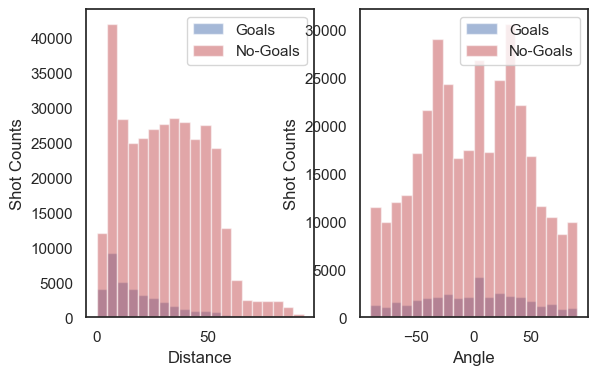

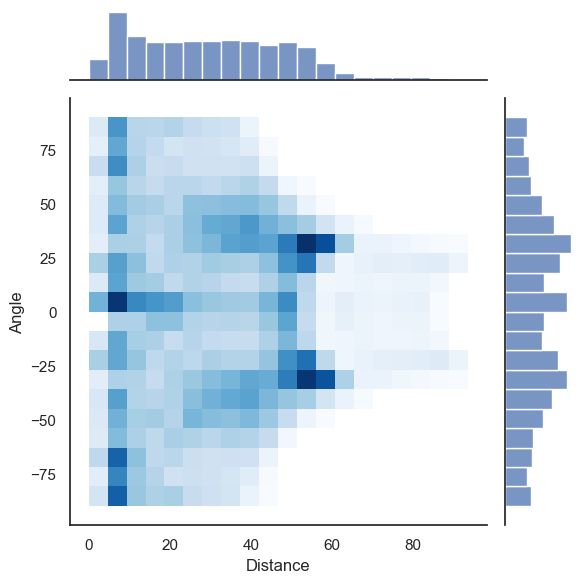

In [63]:


plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.hist(df[df['is_goal'] == 1]['shot_distance_to_goal'], bins=20, color='b', alpha=0.5, label='Goals')
plt.hist(df[df['is_goal'] == 0]['shot_distance_to_goal'], bins=20, color='r', alpha=0.5, label='No-Goals')
plt.xlabel('Distance')
plt.ylabel('Shot Counts')
plt.legend()

plt.subplot(132)
plt.hist(df[df['is_goal'] == 1]['angle'], bins=20, color='b', alpha=0.5, label='Goals')
plt.hist(df[df['is_goal'] == 0]['angle'], bins=20, color='r', alpha=0.5, label='No-Goals')
plt.xlabel('Angle')
plt.ylabel('Shot Counts')
plt.legend()

sns.set(style="white")
sns.jointplot(x="shot_distance_to_goal", y="angle", data=df, kind="hist", cmap="Blues", bins=(20, 20))

plt.xlabel('Distance')
plt.ylabel('Angle')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Goal Rate (Angle)')

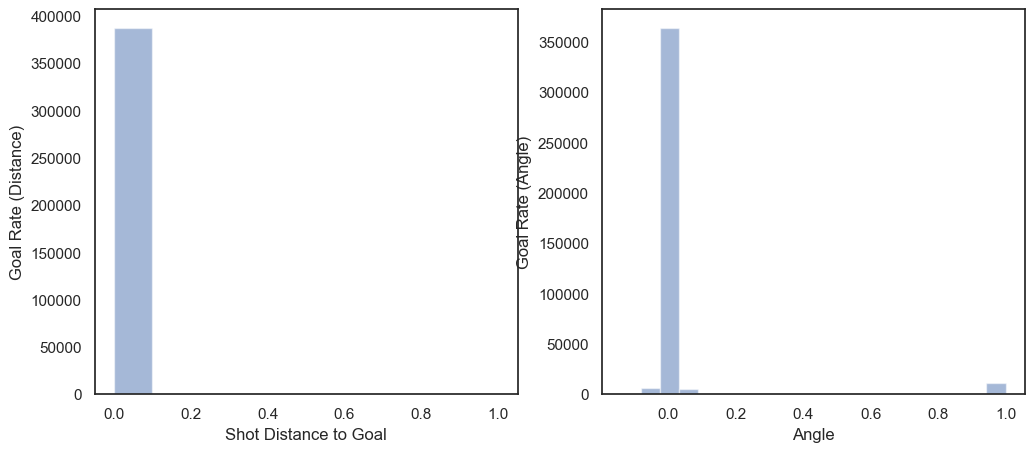

In [102]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.hist(df['goal_rate_dist'], bins=10, color='b', alpha=0.5, label='Goals')
plt.xlabel('Shot Distance to Goal')
plt.ylabel('Goal Rate (Distance)')

plt.subplot(122)
plt.hist(df['goal_rate_angle'], bins=20, color='b', alpha=0.5, label='Goals')
plt.xlabel('Angle')
plt.ylabel('Goal Rate (Angle)')

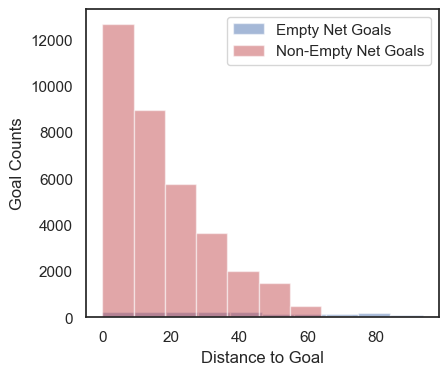

In [103]:

# Create histograms for empty net and non-empty net goals binned by distance
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(empty_net_goals['shot_distance_to_goal'], bins=10, color='b', alpha=0.5, label='Empty Net Goals')
plt.hist(non_empty_net_goals['shot_distance_to_goal'], bins=10, color='r', alpha=0.5, label='Non-Empty Net Goals')
plt.xlabel('Distance to Goal')
plt.ylabel('Goal Counts')
plt.legend()

plt.show()